In [1]:
import pandas as pd
import numpy as np
from sklearn import * 
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("/data/credit-default.csv")
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_length       1000 non-null object
installment_rate        1000 non-null int64
personal_status         1000 non-null object
other_debtors           1000 non-null object
residence_history       1000 non-null int64
property                1000 non-null object
age                     1000 non-null int64
installment_plan        1000 non-null object
housing                 1000 non-null object
existing_credits        1000 non-null int64
default                 1000 non-null int64
dependents              1000 non-null int64
telephone               1000 non-null object
foreign_worker          1000 non-null object
jo

In [4]:
df.default.value_counts()

1    700
2    300
Name: default, dtype: int64

In [36]:
target = "default"
label_encoder = preprocessing.LabelEncoder()

y = label_encoder.fit_transform(df[target])
X = df.drop(columns=[target])

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                 test_size = 0.3, random_state = 1)


est = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=25)

est.fit(X_train, y_train)

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

test accurarcy 0.74
train accurarcy 0.7471428571428571
test precision 0.58
train precision 0.6412213740458015
test recall 0.3372093023255814
train recall 0.3925233644859813
confusion matrix
 [[193  21]
 [ 57  29]]


Text(0.5, 1.0, 'auc: 0.7263094979352314')

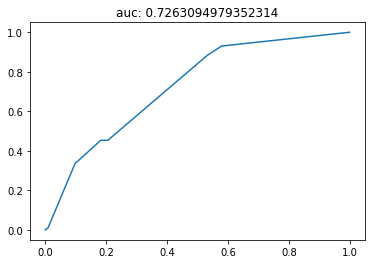

In [37]:
print("test accurarcy", metrics.accuracy_score(y_test, y_test_pred))
print("train accurarcy", metrics.accuracy_score(y_train, y_train_pred))

print("test precision", metrics.precision_score(y_test, y_test_pred))
print("train precision", metrics.precision_score(y_train, y_train_pred))

print("test recall", metrics.recall_score(y_test, y_test_pred))
print("train recall", metrics.recall_score(y_train, y_train_pred))

print("confusion matrix\n", metrics.confusion_matrix(y_test, y_test_pred))

y_test_prob = est.predict_proba(X_test)[:,1]
fpr, tpr, threshoolds = metrics.roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr)
plt.title("auc: {}".format(metrics.auc(fpr, tpr)))

In [38]:
from sklearn.tree import export_graphviz
export_graphviz(est, out_file = "tree.dot", feature_names = X.columns, filled=True)
!dot -Tpng tree.dot -o tree.png


In [39]:
summary = pd.DataFrame({"feature": X.columns, "importance": est.feature_importances_})
summary.sort_values("importance", ascending = False)

,feature,importance
9,checking_balance_unknown,0.533473
0,months_loan_duration,0.183929
24,savings_balance_< 100 DM,0.086350
11,credit_history_fully repaid,0.085644
39,installment_plan_none,0.060633
35,other_debtors_none,0.027046
27,employment_length_1 - 4 yrs,0.022925
36,property_other,0.000000
28,employment_length_4 - 7 yrs,0.000000
29,employment_length_> 7 yrs,0.000000


In [40]:
target = "default"
label_encoder = preprocessing.LabelEncoder()

y = label_encoder.fit_transform(df[target])
X = df.drop(columns=[target])

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                 test_size = 0.3, random_state = 1)


est = ensemble.RandomForestClassifier(n_estimators=20, max_features=0.6, 
                        max_depth=3, min_samples_leaf=10, min_samples_split=25)

est.fit(X_train, y_train)

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

test accurarcy 0.73
train accurarcy 0.7485714285714286
test precision 0.6190476190476191
train precision 0.88
test recall 0.1511627906976744
train recall 0.205607476635514
confusion matrix
 [[206   8]
 [ 73  13]]


Text(0.5, 1.0, 'auc: 0.777955879156705')

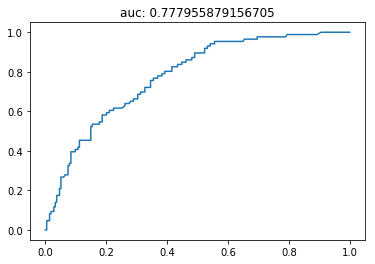

In [41]:
print("test accurarcy", metrics.accuracy_score(y_test, y_test_pred))
print("train accurarcy", metrics.accuracy_score(y_train, y_train_pred))

print("test precision", metrics.precision_score(y_test, y_test_pred))
print("train precision", metrics.precision_score(y_train, y_train_pred))

print("test recall", metrics.recall_score(y_test, y_test_pred))
print("train recall", metrics.recall_score(y_train, y_train_pred))

print("confusion matrix\n", metrics.confusion_matrix(y_test, y_test_pred))

y_test_prob = est.predict_proba(X_test)[:,1]
fpr, tpr, threshoolds = metrics.roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr)
plt.title("auc: {}".format(metrics.auc(fpr, tpr)))

In [42]:
summary = pd.DataFrame({"feature": X.columns, "importance": est.feature_importances_})
summary.sort_values("importance", ascending = False)

,feature,importance
9,checking_balance_unknown,0.400560
1,amount,0.152602
0,months_loan_duration,0.125229
7,checking_balance_< 0 DM,0.051981
2,installment_rate,0.050997
11,credit_history_fully repaid,0.038677
4,age,0.034297
39,installment_plan_none,0.034185
15,purpose_car (used),0.015491
24,savings_balance_< 100 DM,0.014863
